Aim- The objective of this study is to effectively predict if the patient suffers from heart disease. The health
professional enters the input values from the patient's health report. Create a model which predicts the
probability of having heart disease.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('heart.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No null values in the dataset

In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.shape

(303, 14)

In [12]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

Here, the target variable is output.
1 if the patient is positive 
0 if the patient is negative.

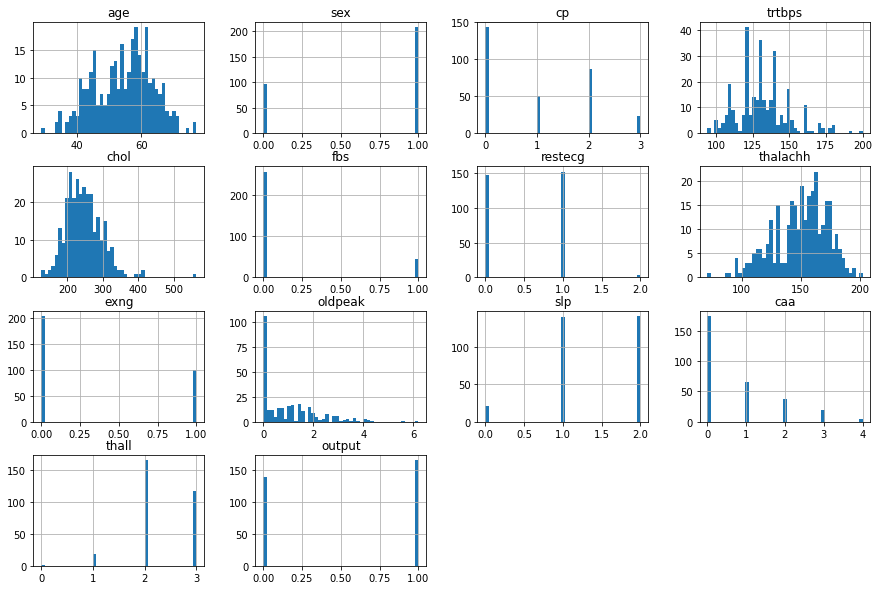

In [13]:
df.hist(bins = 45, figsize = (15,10))
plt.show()

In [14]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

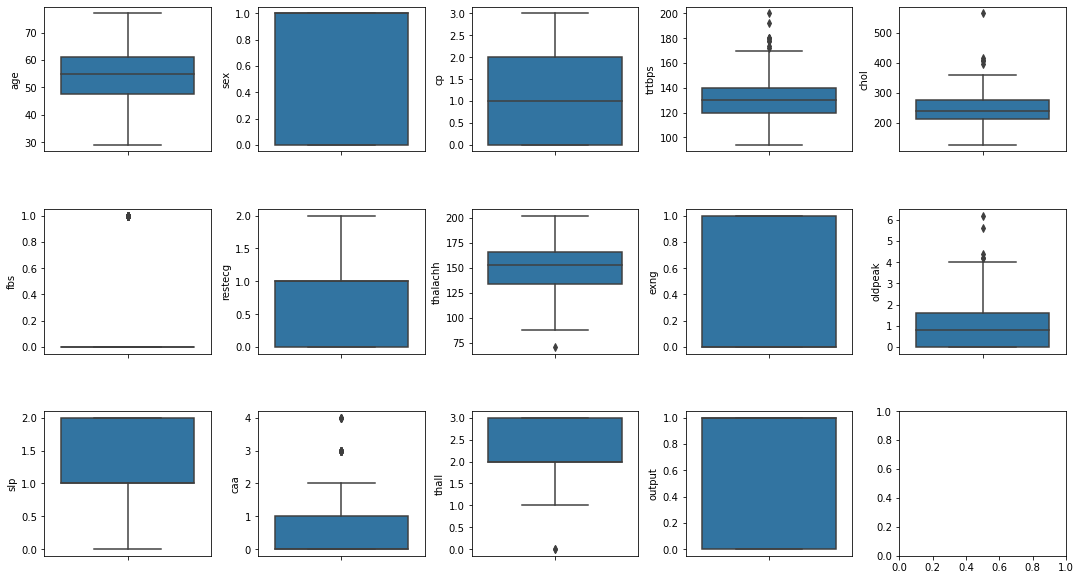

In [15]:
fig, ax = plt.subplots(ncols = 5, nrows = 3, figsize = (15,8))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y = col, data = df, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

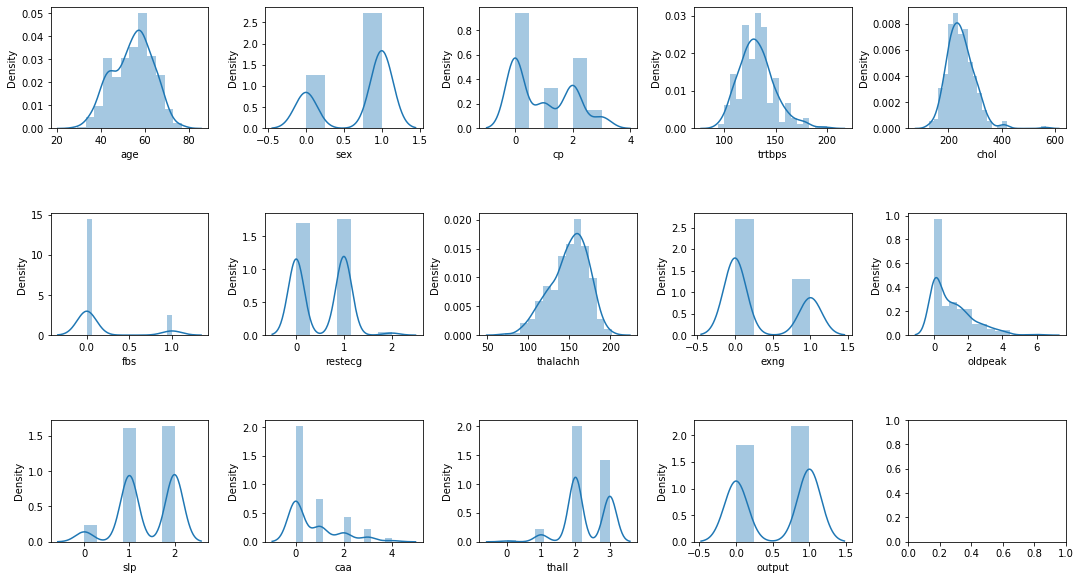

In [16]:
fig, ax = plt.subplots(ncols = 5, nrows = 3, figsize = (15,8))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

In [17]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

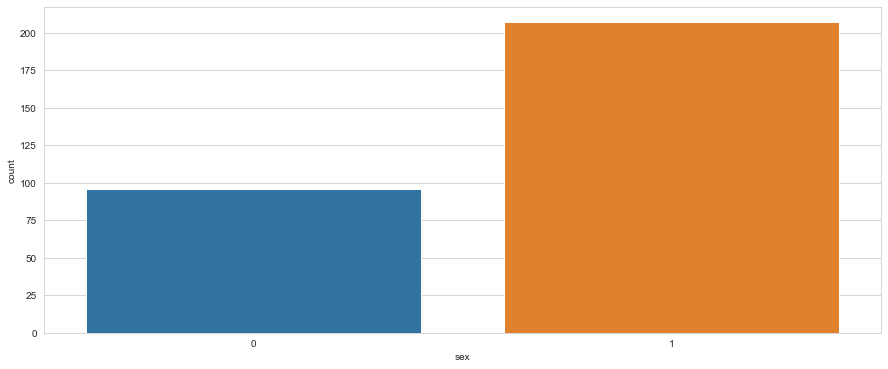

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,6))
sns.countplot(x = 'sex', data = df)

<AxesSubplot:xlabel='output', ylabel='count'>

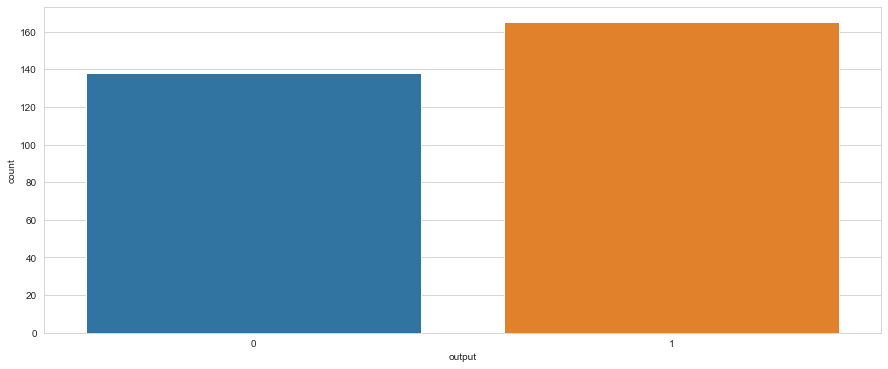

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,6))
sns.countplot(x = 'output', data = df)

<AxesSubplot:xlabel='slp', ylabel='count'>

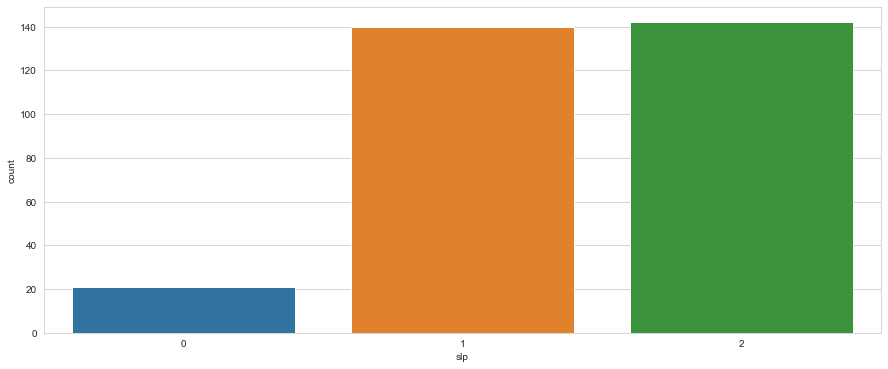

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,6))
sns.countplot(x = 'slp', data = df)

<AxesSubplot:xlabel='cp', ylabel='count'>

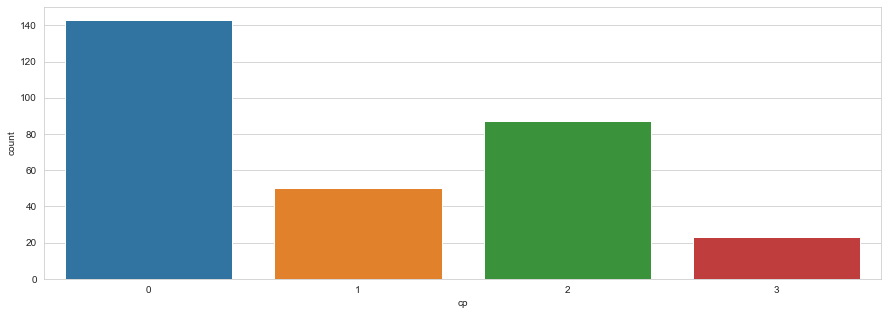

In [21]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'cp', data = df)

<AxesSubplot:xlabel='age', ylabel='count'>

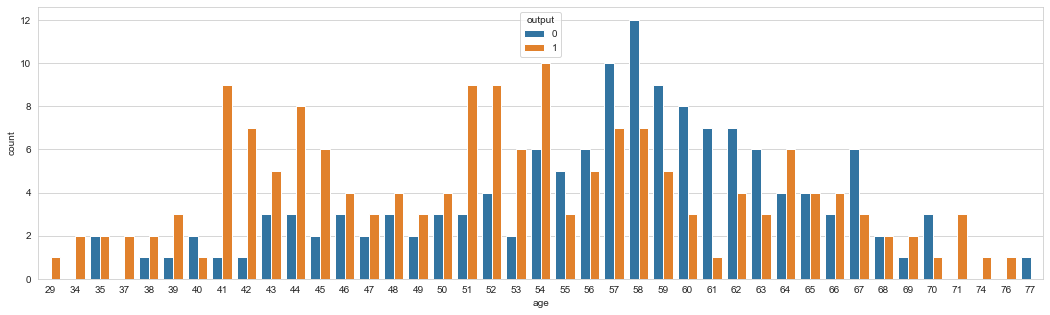

In [22]:
plt.figure(figsize = (18,5))
sns.countplot(x = 'age', hue = 'output', data = df)

Heart disease is more common among people aged less than 54

<AxesSubplot:xlabel='sex', ylabel='count'>

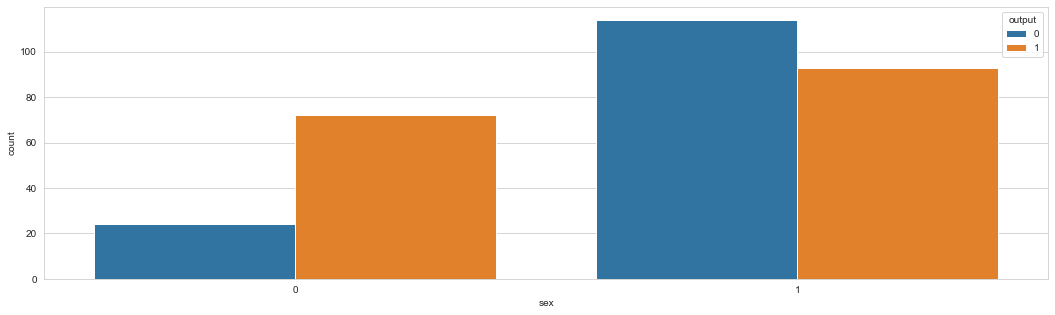

In [23]:
plt.figure(figsize = (18,5))
sns.countplot(x = 'sex', hue = 'output', data = df)

In females, disease is more widespread as compared to males.

<AxesSubplot:xlabel='age', ylabel='count'>

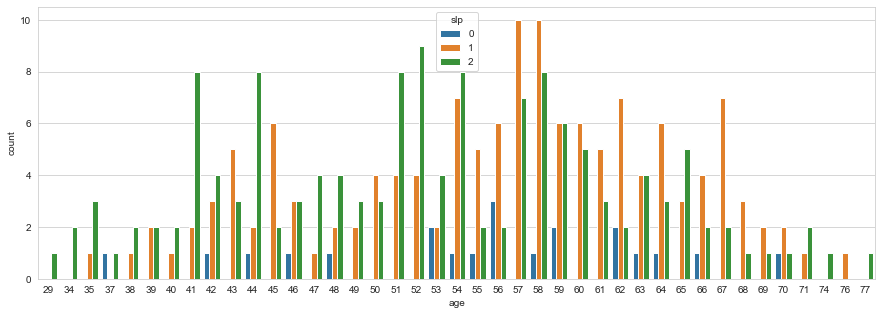

In [24]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'age',hue='slp',data = df)

Slope segement 2 is common among people aged less than 55 and then slope segment 1 gets common.

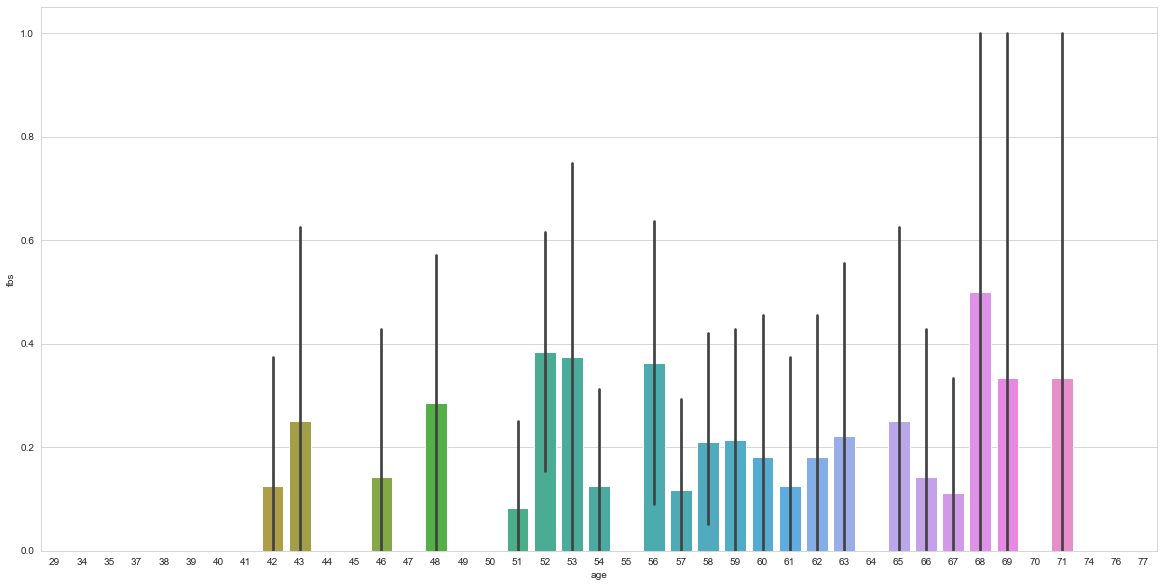

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['age'],y=df['fbs'],data=df)
plt.show()

People aged less than 42 have very low chances of having high blood sugar level.

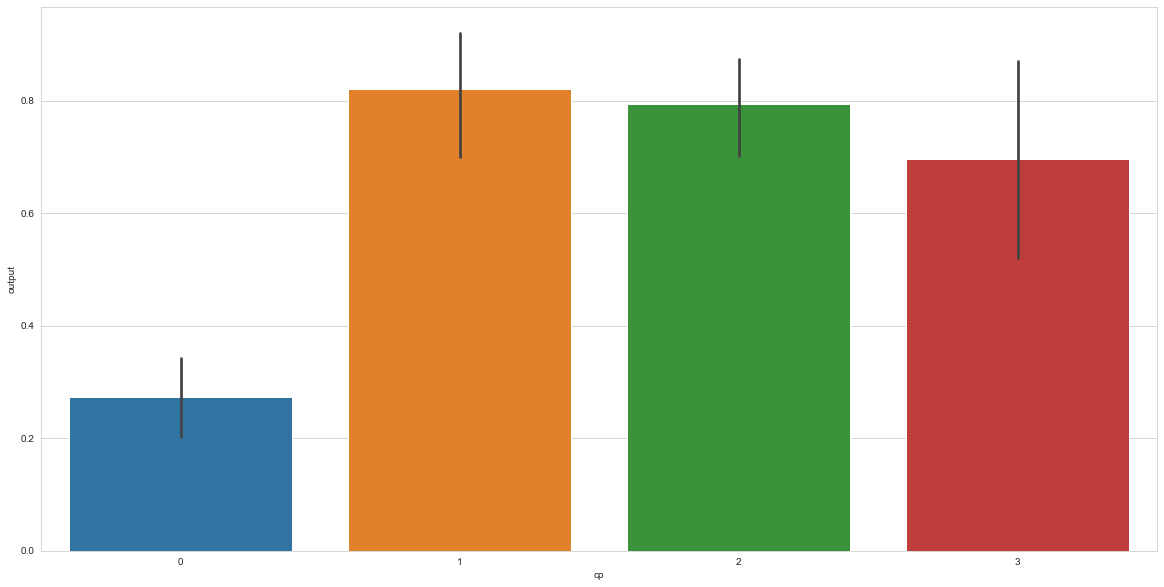

In [101]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['cp'],y=df['output'],data=df)
plt.show()

People with cp>0 more likely to suffer from this heart disease.

<AxesSubplot:xlabel='age', ylabel='caa'>

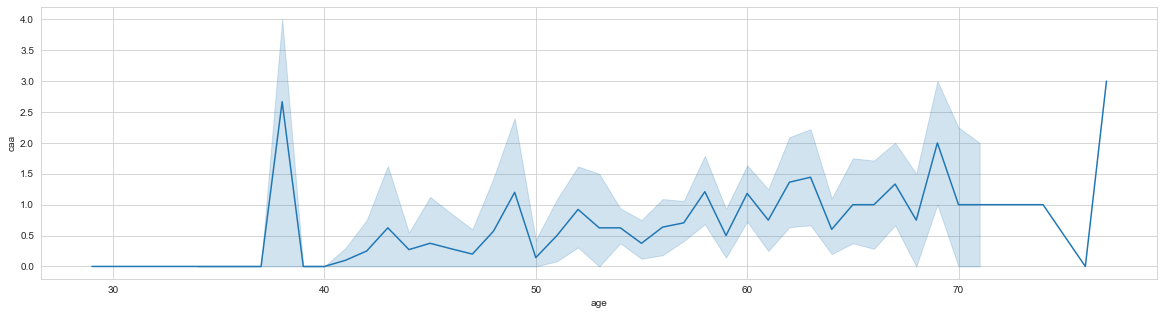

In [26]:
plt.figure(figsize=(20,5))
sns.lineplot(x='age',y='caa',data=df)

Vessel coloring usually stars after age 40

Text(0.5, 1.0, 'Distribution Plot of Age with Target')

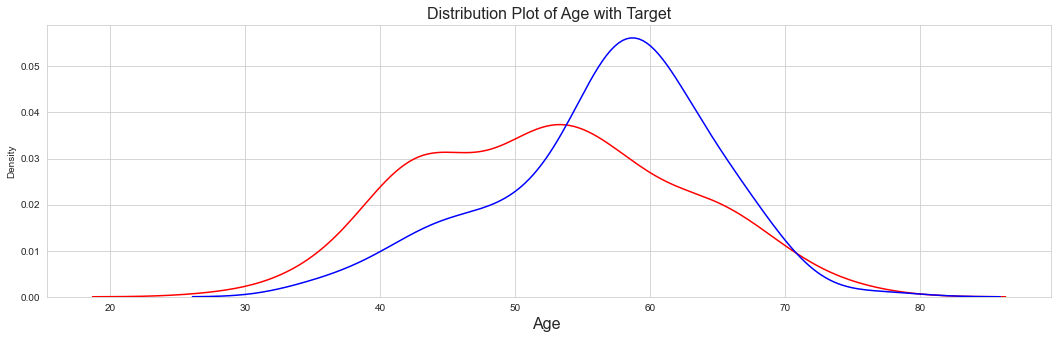

In [27]:
plt.figure(figsize = (18,5))
sns.distplot(df['age'][df['output'] == 1], hist = False, color = 'red')
sns.distplot(df['age'][df['output'] == 0], hist = False, color = 'blue')
plt.xlabel('Age ', fontsize = 16)
plt.title('Distribution Plot of Age with Target', fontsize = 16)

As age increases, the risk of getting heart disease increases.

<AxesSubplot:xlabel='cp', ylabel='count'>

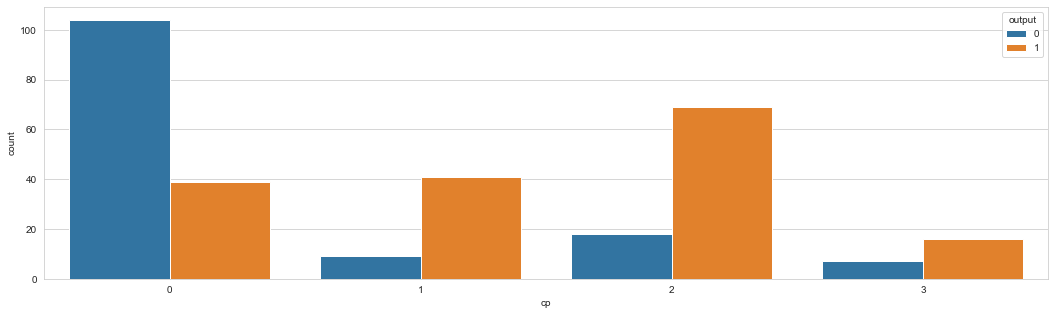

In [28]:
plt.figure(figsize = (18,5))
sns.countplot(x = 'cp', hue = 'output', data = df)

Chest pain type 0 most common among people not suffering from heart disease. 

<AxesSubplot:xlabel='sex', ylabel='caa'>

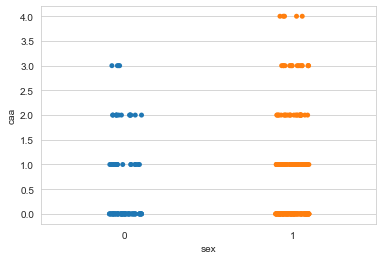

In [29]:
sns.stripplot(x=df['sex'],y=df['caa'])

Females least likely to have vessel coloring 4

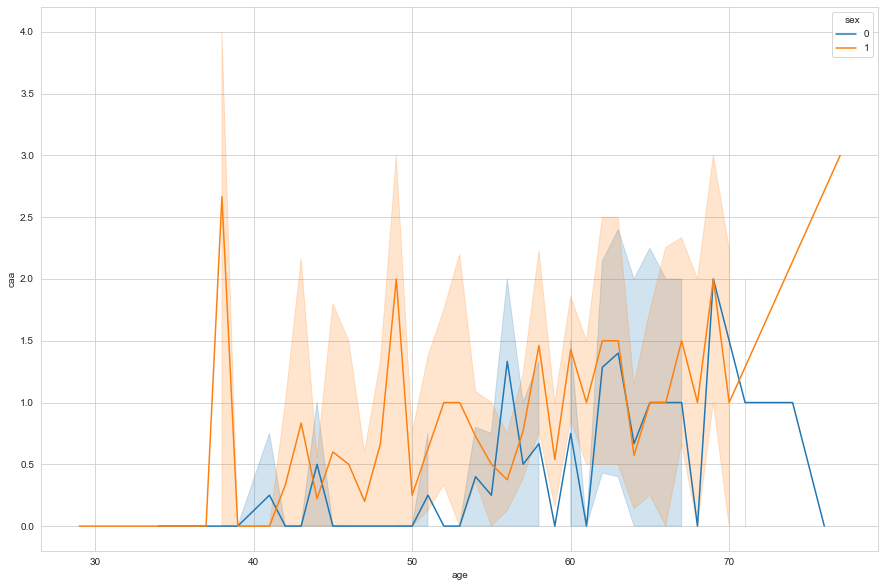

In [30]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['age'],y=df['caa'],hue=df['sex'])
plt.title('',fontsize='30')
plt.show()

Males likely to experience  vessel coloring than females with increasing age.

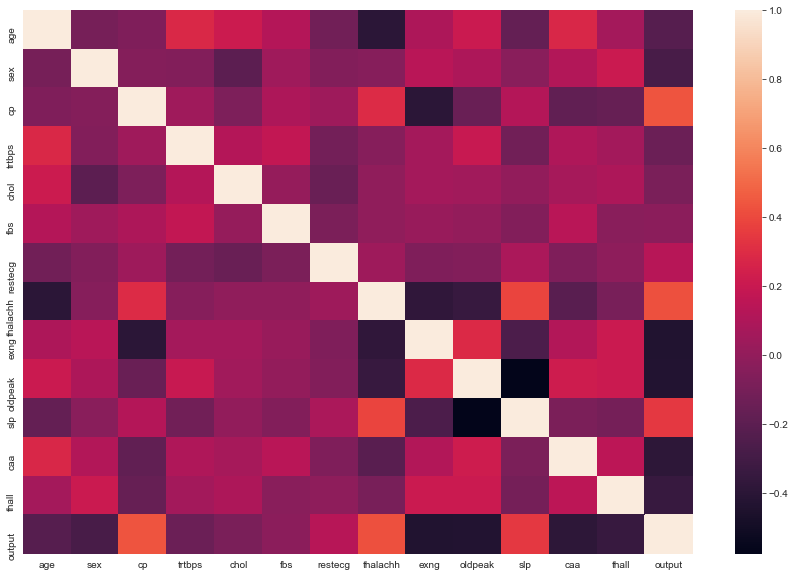

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())
plt.show()

# Pre-Processing Data

In [32]:
X = df.drop(columns = ['output'])
y = df['output']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 51)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(227, 13)
(227,)
(76, 13)
(76,)


25% test data and 75% training data.
Random state initialized from 78

# Modeling

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 0.8458149779735683
Testing accuracy  : 0.881578947368421


[[30  7]
 [ 2 37]]


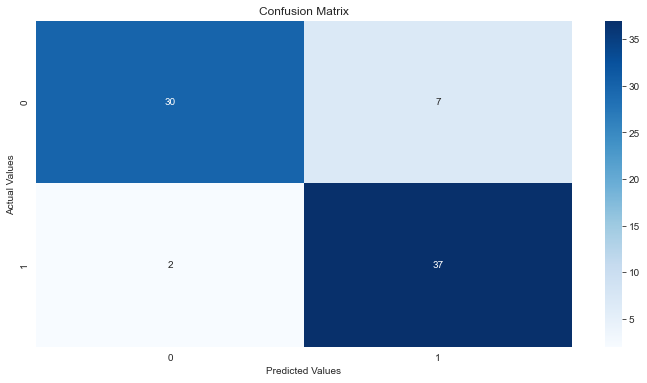

In [37]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
cm=confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

TP-30
FP-7
FN-2
TN-37

In [38]:
print('Classification report for train data is : \n',
      classification_report(y_train, y_pred_train))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred_test))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.89      0.74      0.81       101
           1       0.82      0.93      0.87       126

    accuracy                           0.85       227
   macro avg       0.86      0.84      0.84       227
weighted avg       0.85      0.85      0.84       227



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        37
           1       0.84      0.95      0.89        39

    accuracy                           0.88        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76



In [39]:
from sklearn import metrics
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_train))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

print('\n')
print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.15418502202643172
Mean Absolute Error           : 0.15418502202643172
Root mean Square Error (RMSE) : 0.3926640065328521


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.11842105263157894
Mean Absolute Error           : 0.11842105263157894
Root mean Square Error (RMSE) : 0.34412360080584264


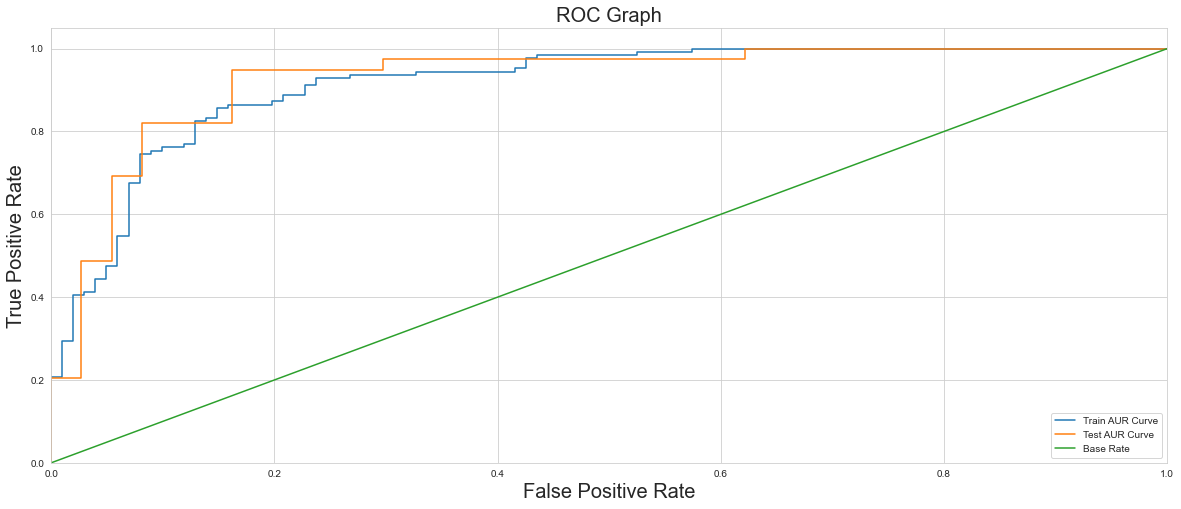

In [40]:
from sklearn.metrics import roc_curve
FPR_lr_train, TPR_lr_train, Thresholds_train = roc_curve(y_train, lr.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_lr_train)
tpr_series = pd.Series(TPR_lr_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_lr_test, TPR_lr_test, Thresholds_test = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_lr_test)
tpr_series = pd.Series(TPR_lr_test)
thresholds_series = pd.Series(Thresholds_test)

from sklearn.metrics import roc_curve

sns.set_style("whitegrid")
plt.figure(figsize = (20,8))

plt.plot(FPR_lr_train, TPR_lr_train, label = 'Train AUR Curve')
plt.plot(FPR_lr_test, TPR_lr_test,   label = 'Test AUR Curve')


# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")
plt.show()

In [41]:
fpr_series

0     0.000000
1     0.000000
2     0.000000
3     0.027027
4     0.027027
5     0.054054
6     0.054054
7     0.081081
8     0.081081
9     0.162162
10    0.162162
11    0.297297
12    0.297297
13    0.621622
14    0.621622
15    1.000000
dtype: float64

In [42]:
tpr_series

0     0.000000
1     0.025641
2     0.205128
3     0.205128
4     0.487179
5     0.487179
6     0.692308
7     0.692308
8     0.820513
9     0.820513
10    0.948718
11    0.948718
12    0.974359
13    0.974359
14    1.000000
15    1.000000
dtype: float64

ROC curve to indicate optimum threshhold based on points obtained through confusion matrices.

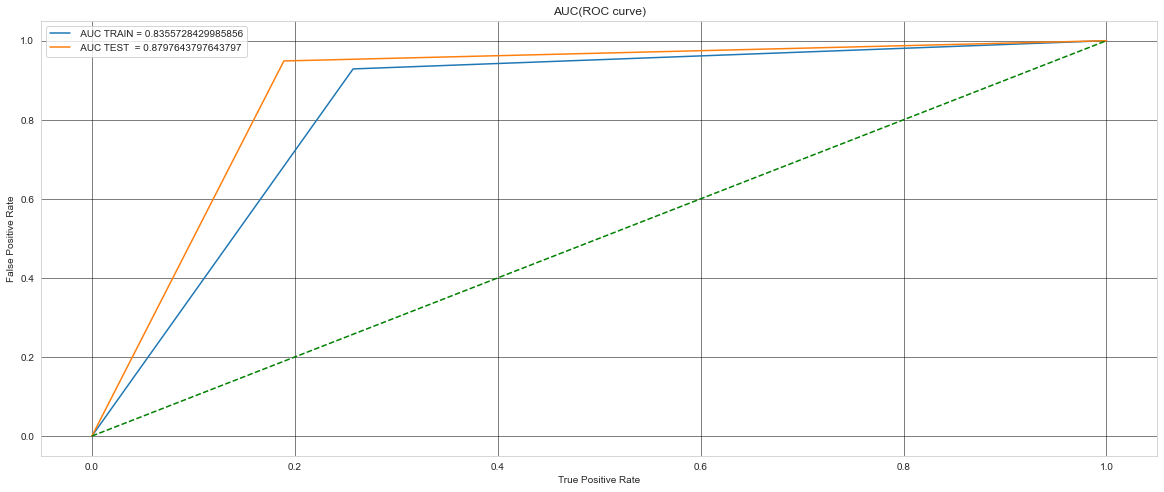

In [43]:
from sklearn.metrics import auc
FPR_lr_train, TPR_lr_train, Thresholds_train = roc_curve(y_train, y_pred_train)
FPR_lr_test, TPR_lr_test, Thresholds_test    = roc_curve(y_test, y_pred_test)

plt.figure(figsize = (20,8))
plt.grid()
plt.plot(FPR_lr_train, TPR_lr_train, label = " AUC TRAIN = "+str(auc(FPR_lr_train, TPR_lr_train)))
plt.plot(FPR_lr_test, TPR_lr_test,   label = " AUC TEST  = "+str(auc(FPR_lr_test, TPR_lr_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.show()

AUC curve indicating test accuracy is greater than training accuracy.

In [44]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.351932
         Iterations 7


In [45]:
FPR_lr_test

array([0.        , 0.18918919, 1.        ])

In [46]:
TPR_lr_test

array([0.        , 0.94871795, 1.        ])

In [47]:
lr.predict_proba(x_test)[:,1]

array([0.13872046, 0.02242211, 0.95651619, 0.94484762, 0.92697691,
       0.89359569, 0.91363557, 0.04253618, 0.08105195, 0.00306214,
       0.00364903, 0.16197498, 0.71395168, 0.99060359, 0.06164386,
       0.58232321, 0.02125235, 0.85493047, 0.0077399 , 0.09127608,
       0.77459376, 0.58342748, 0.02082202, 0.04361003, 0.09528978,
       0.59176627, 0.55273157, 0.76427237, 0.90402963, 0.92474115,
       0.91531562, 0.35706274, 0.92603069, 0.02277161, 0.98195468,
       0.5194944 , 0.74920928, 0.90128289, 0.69492067, 0.26402189,
       0.95141143, 0.02003714, 0.96049582, 0.85330176, 0.52777469,
       0.00893948, 0.56868057, 0.07273548, 0.93543762, 0.92937822,
       0.95075901, 0.8381387 , 0.96754327, 0.29193916, 0.46232124,
       0.68718103, 0.81976873, 0.24545774, 0.38237235, 0.94644529,
       0.11623091, 0.2480497 , 0.08573713, 0.06423301, 0.73987735,
       0.25676544, 0.73359914, 0.79074398, 0.95303807, 0.3081743 ,
       0.86146152, 0.05999811, 0.97178111, 0.90915452, 0.97775

In [48]:
Thresholds_train

array([2, 1, 0], dtype=int64)

In [49]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Thu, 20 Jan 2022   Pseudo R-squ.:                  0.4893
Time:                        22:35:55   Log-Likelihood:                -106.64
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 4.088e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0128      0.019      0.670      0.503      -0.025       0.050
sex           -1.6381      0.452     -3.625      0.000      -2.524      -0.752
cp             0.8490      0.184      4.613      0.0

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred_dtc_train = dtc.predict(x_train)
y_pred_dtc_test  = dtc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_dtc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_dtc_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.7763157894736842


In [52]:
cm_test = confusion_matrix(y_test, y_pred_dtc_test)
print(cm_test)

[[29  8]
 [ 9 30]]


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test  = rfc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_rfc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_rfc_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.8552631578947368


In [55]:
cm_test = confusion_matrix(y_test, y_pred_rfc_test)
print(cm_test)

[[30  7]
 [ 4 35]]


# SVM

In [56]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [57]:
y_pred_svm_train = svm.predict(x_train)
y_pred_svm_test  = svm.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_svm_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_svm_test, y_test))

Training accuracy : 0.6563876651982379
Testing accuracy  : 0.6447368421052632


# K-Neighbours Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,25):
        neigh = KNeighborsClassifier(n_neighbors = i)

In [70]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [71]:
y_pred_knn_train = neigh.predict(x_train)
y_pred_knn_test  = neigh.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_knn_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_knn_test, y_test))

Train Accuracy :  0.7004405286343612
Test Accuracy  :  0.631578947368421


# Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
 
y_pred_gnb_train = clf.predict(x_train)
y_pred_gnb_test  = clf.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_gnb_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_gnb_test, y_test))

Train Accuracy :  0.8414096916299559
Test Accuracy  :  0.8289473684210527


# XGB Classifier

In [61]:
from xgboost import XGBClassifier
gbm = XGBClassifier()
gbm.fit(x_train, y_train)

[22:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred_xgb_train = gbm.predict(x_train)
y_pred_xgb_test  = gbm.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_xgb_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_xgb_test, y_test))

Train Accuracy :  1.0
Test Accuracy  :  0.7763157894736842


# AdaBoost

In [85]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()
adc.fit(x_train, y_train)

AdaBoostClassifier()

In [86]:
y_pred_abc_train = adc.predict(x_train)
y_pred_abc_test  = adc.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_abc_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_abc_test, y_test))

Train Accuracy :  0.9383259911894273
Test Accuracy  :  0.7631578947368421


# Increasing accuracy of models

# Grid Search CV

# 1. Logistic Regression

In [63]:
logreg = LogisticRegression()
params = {'C': np.logspace(-1, 1, 50), 
          'penalty': ['None', 'l1', 'l2'], 
          'solver': ['newton-cg', 'liblinear', 'sag', 'saga'], 
          'max_iter': [100, 150, 200, 500, 1000] 
         }

log_grid = GridSearchCV(estimator = logreg, 
                        param_grid = params, 
                        scoring = 'accuracy', 
                        cv = 5, 
                        n_jobs = -1)

log_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.10985411,  0.12067926,  0.13257114,  0.14563485,
        0.15998587,  0.17575106,  0.19306977,  0.21209509,  0.23299518,
        0.25595479,  0.28117687,  0.30888436,  0.33932218,  0.37275937,
        0.40949151,  0.44984327,  0.49417134,  0.54286754,  0.59636233,
        0.65512856,  0.71968567,  0.79060432,  0.86851137,  0.95409548,
        1.04811313,  1.1513954 ,  1.26485522,  1.38949549,  1.52641797,
        1.67683294,  1.84206997,  2.02358965,  2.22299648,  2.44205309,
        2.6826958 ,  2.9470517 ,  3.23745754,  3.55648031,  3.90693994,
        4.29193426,  4.71486636,  5.17947468,  5.68986603,  6.25055193,
        6.86648845,  7.54312006,  8.28642773,  9.10298178, 10.        ]),
                         'max_iter': [100, 150, 200, 500, 1000],
                         'penalty': ['None', 'l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear', '

In [64]:
print("Best parameters for the model :", log_grid.best_params_)
print("Best score for the model      :", log_grid.best_score_)

Best parameters for the model : {'C': 9.102981779915218, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for the model      : 0.8280193236714977


In [65]:
y_pred_hyp_train = log_grid.predict(x_train)
y_pred_hyp_test  = log_grid.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_hyp_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_hyp_test, y_test))

Training accuracy : 0.8502202643171806
Testing accuracy  : 0.868421052631579


In [66]:
from sklearn.model_selection import RandomizedSearchCV
log_grid_Rs = RandomizedSearchCV(LogisticRegression(), 
                              param_distributions = params, 
                              scoring = 'accuracy', 
                              cv = 5, 
                              verbose = True)

log_grid_Rs.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([ 0.1       ,  0.10985411,  0.12067926,  0.13257114,  0.14563485,
        0.15998587,  0.17575106,  0.19306977,  0.21209509,  0.23299518,
        0.25595479,  0.28117687,  0.30888436,  0.33932218,  0.37275937,
        0.40949151,  0.44984327,  0.49417134,  0.54286754,  0.59636233,
        0.65512856,  0.71968567,  0.79060432,  0.86851137,  0.9540...
        1.67683294,  1.84206997,  2.02358965,  2.22299648,  2.44205309,
        2.6826958 ,  2.9470517 ,  3.23745754,  3.55648031,  3.90693994,
        4.29193426,  4.71486636,  5.17947468,  5.68986603,  6.25055193,
        6.86648845,  7.54312006,  8.28642773,  9.10298178, 10.        ]),
                                        'max_iter': [100, 150, 200, 500, 1000],
                                        'penalty': ['None', 'l1', 'l2'],
                                        'solver': ['newton-cg', 'liblinear',
                    

In [67]:
print("Best parameters for the model :", log_grid_Rs.best_params_)
print("Best score for the model      :", log_grid_Rs.best_score_)

Best parameters for the model : {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 150, 'C': 0.49417133613238345}
Best score for the model      : 0.8150724637681159


In [68]:
y_pred_hyp1_train = log_grid_Rs.predict(x_train)
y_pred_hyp1_test  = log_grid_Rs.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_hyp1_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_hyp1_test, y_test))

Training accuracy : 0.8502202643171806
Testing accuracy  : 0.881578947368421


# 2. Random Forest

In [75]:
params = {
    'n_estimators':[100, 200, 300], 
    'max_depth': [3, 5, 10], 
    'min_samples_split': np.arange(2,20,2), 
    'min_samples_leaf': np.arange(1,20,2), 
    'criterion': ["gini", "entropy"] 
}

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 1, 
                           scoring = "accuracy")

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed: 12.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [76]:
print("Best parameters for the model :", grid_search.best_params_)
print("Best score for the model      :", grid_search.best_score_)

Best parameters for the model : {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 10, 'n_estimators': 100}
Best score for the model      : 0.8592270531400965


In [77]:
train_rfc_pred = grid_search.predict(x_train)
test_rfc_pred  = grid_search.predict(x_test)

print("Train Accuracy : ",accuracy_score(y_train, train_rfc_pred))
print("Test Accuracy  : ",accuracy_score(y_test, test_rfc_pred))

Train Accuracy :  0.8766519823788547
Test Accuracy  :  0.8552631578947368


# 3. KNN

In [79]:
knn = KNeighborsClassifier()

params = {'n_neighbors':list(range(1,25,)), 
          'p':[1, 2, 3, 4], 
          'leaf_size':list(range(1,50,3)), 
          'weights':['uniform', 'distance']
         }

knn_grid = GridSearchCV(estimator = knn, 
                        param_grid = params, 
                        scoring = 'accuracy', 
                        cv = 5, 
                        n_jobs = -1)

knn_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31,
                                       34, 37, 40, 43, 46, 49],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24],
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [80]:
print("Best parameters for the model :", knn_grid.best_params_)
print("Best score for the model      :", knn_grid.best_score_)

Best parameters for the model : {'leaf_size': 1, 'n_neighbors': 16, 'p': 1, 'weights': 'uniform'}
Best score for the model      : 0.7051207729468599


In [81]:
y_pred_knn_train = knn_grid.predict(x_train)
y_pred_knn_test  = knn_grid.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_knn_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_knn_test, y_test))

Train Accuracy :  0.7400881057268722
Test Accuracy  :  0.6578947368421053



# 4. SVM

In [82]:
model = SVC()
param = {'C': [0.01, 0.001, 0.0001, 0.1, 0.8, 0.9, 1 ,1.1 ,1.2 ,1.3 ,1.4], 
         'kernel':['linear', 'rbf'], 
         'gamma' :[1, 1.1, 1.2, 1.3, 1.4] 
        }

grid_svc = GridSearchCV(model, 
                        param_grid = param, 
                        scoring = 'accuracy', 
                        cv = 4)

grid_svc.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.01, 0.001, 0.0001, 0.1, 0.8, 0.9, 1, 1.1, 1.2,
                               1.3, 1.4],
                         'gamma': [1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [83]:
print("Best parameters for the model :", grid_svc.best_params_)
print("Best score for the model      :", grid_svc.best_score_)

Best parameters for the model : {'C': 0.9, 'gamma': 1, 'kernel': 'linear'}
Best score for the model      : 0.8236215538847118


# Feature Importance

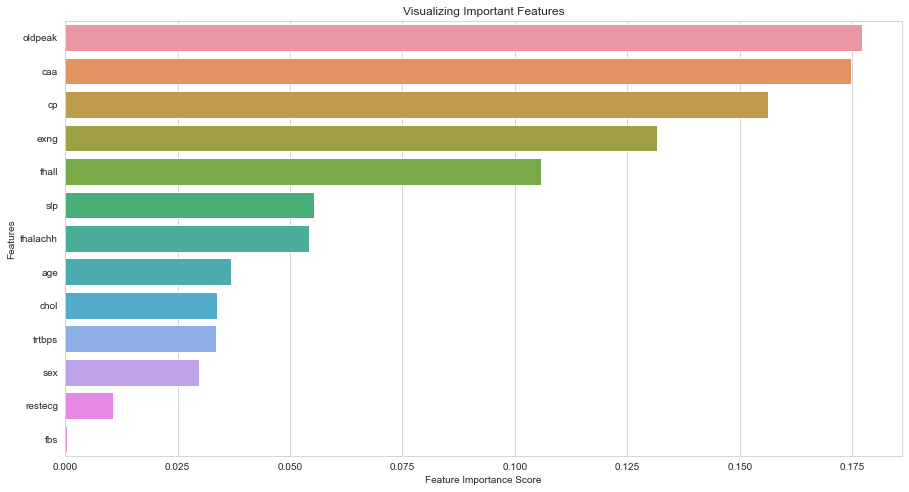

In [88]:
importance = grid_search.best_estimator_.feature_importances_
feature_imp = pd.Series(importance, index = df.columns[:13]).sort_values(ascending = False)
feature_imp
plt.figure(figsize = (15, 8))

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Most obvious symptom of this heart disease is ddpeak.

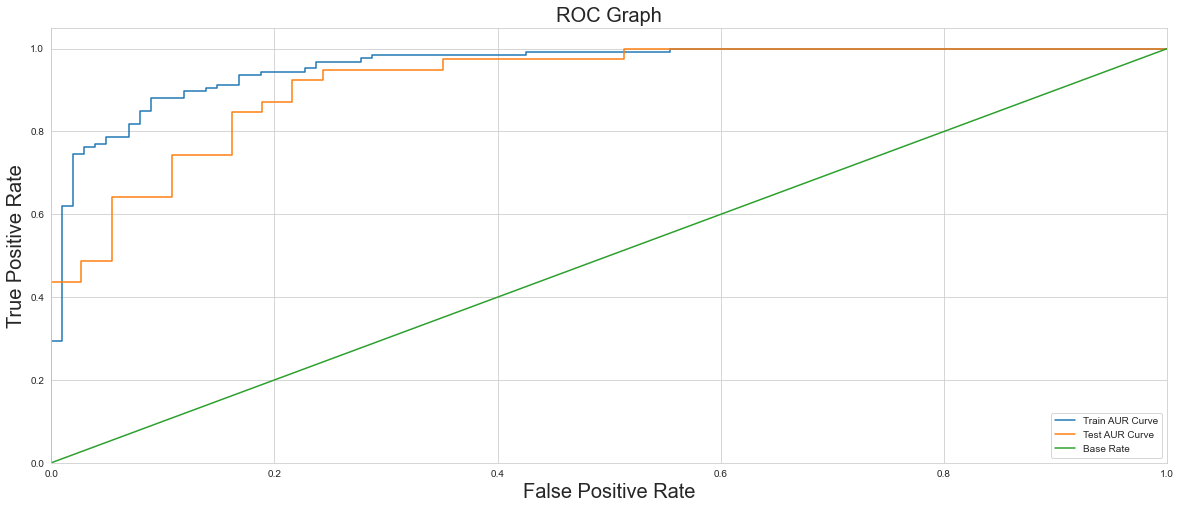

In [89]:
FPR_rfc_train, TPR_rfc_train, Thresholds_train = roc_curve(y_train, grid_search.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_rfc_train)
tpr_series = pd.Series(TPR_rfc_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_rfc_test, TPR_rfc_test, Thresholds_test = roc_curve(y_test, grid_search.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_rfc_test)
tpr_series = pd.Series(TPR_rfc_test)
thresholds_series = pd.Series(Thresholds_test)

from sklearn.metrics import roc_curve

sns.set_style("whitegrid")
plt.figure(figsize = (20,8))

plt.plot(FPR_rfc_train, TPR_rfc_train, label = 'Train AUR Curve')
plt.plot(FPR_rfc_test, TPR_rfc_test,   label = 'Test AUR Curve')


# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")
plt.show()

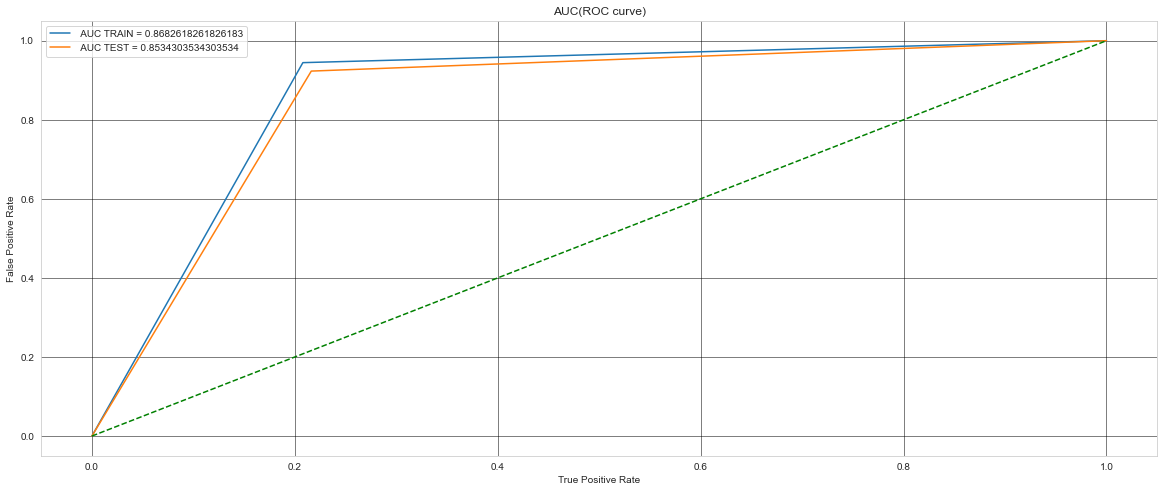

In [90]:
FPR_rfc_train, TPR_rfc_train, Thresholds_train = roc_curve(y_train, train_rfc_pred)
FPR_rfc_test, TPR_rfc_test, Thresholds_test    = roc_curve(y_test, test_rfc_pred)
plt.figure(figsize = (20,8))
plt.grid()

plt.plot(FPR_rfc_train, TPR_rfc_train, label = " AUC TRAIN = "+str(auc(FPR_rfc_train, TPR_rfc_train)))
plt.plot(FPR_rfc_test, TPR_rfc_test,   label = " AUC TEST = "+str(auc(FPR_rfc_test, TPR_rfc_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.show()

# Evaluation Metrics

In [91]:
cm_test = confusion_matrix(y_test, test_rfc_pred)
print(cm_test)

[[29  8]
 [ 3 36]]


In [92]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_rfc_pred))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, test_rfc_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       101
           1       0.85      0.94      0.89       126

    accuracy                           0.88       227
   macro avg       0.88      0.87      0.87       227
weighted avg       0.88      0.88      0.88       227



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        37
           1       0.82      0.92      0.87        39

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [93]:
auc(FPR_rfc_train, TPR_rfc_train)

0.8682618261826183

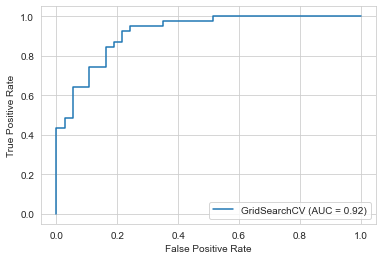

In [94]:
#Plot ROC curve and calculate the AUC metric
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid_search, x_test, y_test)

In [95]:
tp, fn, fp, tn = confusion_matrix(y_test, test_rfc_pred, labels = [1,0]).ravel()
tp, tn, fp, fn

(36, 29, 8, 3)

In [96]:
precision_rate = tp / (tp + fp)
recall_rate    = tp / (tp + fn)

print("The precision rate is : ", precision_rate)
print("The recall rate is    : ", recall_rate)

The precision rate is :  0.8181818181818182
The recall rate is    :  0.9230769230769231


# Conclusion

1. Cardiovascular disease is more coomon among females than males.
2. People aged less than 54 years are more likely to duffer from this.
3. Slope segement 2 is common among people aged less than 55 and then slope segment 1 gets common
4. People aged less than 42 have very low chances of having high blood sugar level.
5. As people grow older(especially after 40), they should start taking care of their cholestrol and blood sugar levels.
6. Vessel coloring usually stars after age 40.
7. Chest pain type 0 most common among people not suffering from heart disease.
8. Males likely to experience vessel coloring than females with increasing age.
9. People with cp>0 more likely to suffer from this heart disease.
10. Females less likely to have vessel coloring 4.
